# EDA notebook

In [1]:
from collections import Counter

import pandas as pd
import seaborn as sns

from sneakers_ml.data.merger.column import ColumnPreprocessor
from sneakers_ml.data.storage.image import (
    get_images_count,
    get_images_formats,
    get_images_modes,
    get_images_sizes,
    get_images_suffixes,
)
from sneakers_ml.utils import most_common

# Full dataset

In [2]:
dataframe = pd.read_csv("data/merged/metadata/full_dataset.csv")
dataframe

,title_merge,brand_merge,images_path,title,title_without_color,brand,collection_name,color,price,pricecurrency,url,website,images_flattened
0,01 low,"['autry', 'autry']",['data/raw/images/sneakerbaas/category-women/a...,"['01 Low ""White""', '01 Low ""Mustard""']","['01 Low', '01 Low']","['Autry', 'Autry']","['category-women', 'category-men']","['White', 'Mustard']","[129.99, 149.99]","['EUR', 'EUR']",['https://www.sneakerbaas.com/collections/snea...,"['sneakerbaas', 'sneakerbaas']",['data/raw/images/sneakerbaas/category-men/aut...
1,01 low m,"['autry', 'autry', 'autry']",['data/raw/images/sneakerbaas/category-men/aut...,"['01 LOW M ""BI EDEN""', '01 LOW M ""BI VIOLET""',...","['01 LOW M', '01 LOW M', '01 LOW M']","['Autry', 'Autry', 'Autry']","['category-men', 'category-men', 'category-men']","['BI EDEN', 'BI VIOLET', 'BLACK']","[149.99, 149.99, 149.99]","['EUR', 'EUR', 'EUR']",['https://www.sneakerbaas.com/collections/snea...,"['sneakerbaas', 'sneakerbaas', 'sneakerbaas']",['data/raw/images/sneakerbaas/category-men/aut...
2,01 low man,['autry'],['data/raw/images/sneakerbaas/category-men/aut...,"['AUTRY 01 LOW MAN ""LEAT/LEAT RED""']",['AUTRY 01 LOW MAN'],['Autry'],['category-men'],['LEAT/LEAT RED'],[149.99],['EUR'],['https://www.sneakerbaas.com/collections/snea...,['sneakerbaas'],['data/raw/images/sneakerbaas/category-men/aut...
3,01 low w,"['autry', 'autry', 'autry', 'autry']",['data/raw/images/sneakerbaas/category-women/a...,"['01 LOW W ""SALTWATER""', '01 LOW W ""WHT/CORAL""...","['01 LOW W', '01 LOW W', '01 LOW W', '01 LOW W']","['Autry', 'Autry', 'Autry', 'Autry']","['category-women', 'category-women', 'category...","['SALTWATER', 'WHT/CORAL', 'BI POW', 'BI IVORY']","[149.99, 149.99, 149.99, 149.99]","['EUR', 'EUR', 'EUR', 'EUR']",['https://www.sneakerbaas.com/collections/snea...,"['sneakerbaas', 'sneakerbaas', 'sneakerbaas', ...",['data/raw/images/sneakerbaas/category-women/a...
4,01 low wom,['autry'],['data/raw/images/sneakerbaas/category-women/a...,"['01 LOW WOM ""WHT/PETROL""']",['01 LOW WOM'],['Autry'],['category-women'],['WHT/PETROL'],[149.99],['EUR'],['https://www.sneakerbaas.com/collections/snea...,['sneakerbaas'],['data/raw/images/sneakerbaas/category-women/a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,zoom verona slip,"['nike skateboarding', 'nike skateboarding']",['data/raw/images/sneakerbaas/category-men/nik...,"['Zoom Verona Slip ""Leo Baker""', 'Zoom Verona ...","['Zoom Verona Slip', 'Zoom Verona Slip']","['Nike Skateboarding', 'Nike Skateboarding']","['category-men', 'category-men']","['Leo Baker', 'Light Dew']","[49.99, 49.99]","['EUR', 'EUR']",['https://www.sneakerbaas.com/collections/snea...,"['sneakerbaas', 'sneakerbaas']",['data/raw/images/sneakerbaas/category-men/nik...
873,zoom verona slip x leticia bufon,['nike skateboarding'],['data/raw/images/sneakerbaas/category-unisex/...,['Zoom Verona Slip x Leticia Bufon'],['Zoom Verona Slip x Leticia Bufon'],['Nike Skateboarding'],['category-unisex'],[''],[39.99],['EUR'],['https://www.sneakerbaas.com/collections/snea...,['sneakerbaas'],['data/raw/images/sneakerbaas/category-unisex/...
874,zoom vomero 5 sp,"['nike', 'nike']",['data/raw/images/superkicks/men-sneakers/nike...,"[""ZOOM VOMERO 5 SP 'VAST GREY/VAST GREY-BLACK-...","['ZOOM VOMERO 5 SP', 'ZOOM VOMERO 5 SP']","['Nike', 'Nike']","['men-sneakers', 'men-sneakers']","['VAST GREY/VAST GREY-BLACK-SAIL', 'ANTHRACITE...","[14995.0, 14995.0]","['INR', 'INR']",['https://www.superkicks.in/products/zoom-vome...,"['superkicks', 'superkicks']",['data/raw/images/superkicks/men-sneakers/nike...
875,zx 22 boost,['adidas originals'],['data/raw/images/sneakerbaas/category-men/adi...,"['ZX 22 BOOST ""Cream White""']",['ZX 22 BOOST'],['Adidas Originals'],['category-men'],['Cream White'],[59.99],['EUR'],['https://www.sneakerbaas.com/collections/snea...,['sneakerbaas'],['data/raw/images/sneakerbaas/category-men/adi...


In [3]:
dataframe = dataframe.drop(
    ["url", "images_flattened", "collection_name", "title", "title_without_color", "images_path", "brand"], axis=1
)
dataframe["price"] = dataframe["price"].apply(lambda x: eval(x)[0])
dataframe["pricecurrency"] = dataframe["pricecurrency"].apply(lambda x: eval(x)[0])
dataframe["brand_merge"] = dataframe["brand_merge"].apply(lambda x: most_common(eval(x)))

In [4]:
dataframe

,title_merge,brand_merge,color,price,pricecurrency,website
0,01 low,autry,"['White', 'Mustard']",129.99,EUR,"['sneakerbaas', 'sneakerbaas']"
1,01 low m,autry,"['BI EDEN', 'BI VIOLET', 'BLACK']",149.99,EUR,"['sneakerbaas', 'sneakerbaas', 'sneakerbaas']"
2,01 low man,autry,['LEAT/LEAT RED'],149.99,EUR,['sneakerbaas']
3,01 low w,autry,"['SALTWATER', 'WHT/CORAL', 'BI POW', 'BI IVORY']",149.99,EUR,"['sneakerbaas', 'sneakerbaas', 'sneakerbaas', ..."
4,01 low wom,autry,['WHT/PETROL'],149.99,EUR,['sneakerbaas']
...,...,...,...,...,...,...
872,zoom verona slip,nike skateboarding,"['Leo Baker', 'Light Dew']",49.99,EUR,"['sneakerbaas', 'sneakerbaas']"
873,zoom verona slip x leticia bufon,nike skateboarding,[''],39.99,EUR,['sneakerbaas']
874,zoom vomero 5 sp,nike,"['VAST GREY/VAST GREY-BLACK-SAIL', 'ANTHRACITE...",14995.00,INR,"['superkicks', 'superkicks']"
875,zx 22 boost,adidas originals,['Cream White'],59.99,EUR,['sneakerbaas']


## Preparations

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_merge    877 non-null    object 
 1   brand_merge    877 non-null    object 
 2   color          877 non-null    object 
 3   price          877 non-null    float64
 4   pricecurrency  877 non-null    object 
 5   website        877 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.2+ KB


In [6]:
dataframe.describe(include="all")

,title_merge,brand_merge,color,price,pricecurrency,website
count,877,877,877,877.000000,877,877
unique,877,36,723,NaN,2,50
top,01 low,nike,[''],NaN,INR,['sneakerbaas']
freq,1,183,52,NaN,499,230
mean,NaN,NaN,NaN,5677.451471,NaN,NaN
std,NaN,NaN,NaN,5823.709353,NaN,NaN
min,NaN,NaN,NaN,11.950000,NaN,NaN
25%,NaN,NaN,NaN,99.950000,NaN,NaN
50%,NaN,NaN,NaN,5499.000000,NaN,NaN
75%,NaN,NaN,NaN,9749.000000,NaN,NaN


# Пропущенные значения отсутствуют

In [7]:
dataframe.isna().sum()

title_merge      0
brand_merge      0
color            0
price            0
pricecurrency    0
website          0
dtype: int64

In [8]:
unique_brands = dataframe["brand_merge"].value_counts()
unique_brands

brand_merge
nike                    183
adidas originals        117
puma sportstyle          93
converse                 57
reebok                   47
puma                     44
jordan                   43
vans                     35
asics                    26
reebok classics          25
kangaroos                24
new balance              22
autry                    17
toms                     17
veja                     15
saucony                  12
clarks originals         11
mizuno                   11
diadora                  10
salomon                  10
karhu                     9
hi tec                    7
clarks                    6
adidas                    6
etonic                    6
suicoke                   5
stepney workers club      4
sergio tacchini           3
nike skateboarding        3
y 3                       2
merrell                   2
fila                      1
crocs                     1
represent                 1
saucony originals         1
warrior 

# Мердж в основном происходит внутри одного вебсайта, между сайтами почти нету пересечений

In [9]:
dataframe["website"].apply(lambda x: set(eval(x))).value_counts()

website
{superkicks}                 463
{sneakerbaas}                378
{sneakerbaas, superkicks}     36
Name: count, dtype: int64

# Топ цветов - тяжело посчитать, все цвета имеют разные названия

In [10]:
Counter(ColumnPreprocessor.flatten_list(dataframe["color"].apply(eval).values)).most_common(10)

[('', 1),
 ('ACADEMY PINK', 1),
 ('ACTION PRT', 1),
 ('ALUMINIUM/WHITE/BURGUNDY', 1),
 ('ALUMINIUM/WONDER MAUVE', 1),
 ('ANIMAL PRINT', 1),
 ('ANTHRACITE/ANTHRACITE-BLACK-WOLF GREY', 1),
 ('AQUA', 1),
 ('AQUAMARINE', 1),
 ('ARCHEO PINK', 1)]

# Основной датасет - как full, только оставили нужные колонки.

In [11]:
main = pd.read_csv("data/merged/metadata/main_dataset.csv")
main

,title_merge,brand_merge,images_path
0,01 low,autry,['data/raw/images/sneakerbaas/category-men/aut...
1,01 low m,autry,['data/raw/images/sneakerbaas/category-men/aut...
2,01 low man,autry,['data/raw/images/sneakerbaas/category-men/aut...
3,01 low w,autry,['data/raw/images/sneakerbaas/category-women/a...
4,01 low wom,autry,['data/raw/images/sneakerbaas/category-women/a...
...,...,...,...
872,zoom verona slip,nike,['data/raw/images/sneakerbaas/category-men/nik...
873,zoom verona slip x leticia bufon,nike,['data/raw/images/sneakerbaas/category-unisex/...
874,zoom vomero 5 sp,nike,['data/raw/images/superkicks/men-sneakers/nike...
875,zx 22 boost,adidas,['data/raw/images/sneakerbaas/category-men/adi...


# Датасет брендов

In [12]:
by_brands = pd.read_csv("data/merged/metadata/brands_dataset.csv")
brands_images_path = "data/merged/images/by-brands"
by_brands

,brand_merge,unique_images_count,images
0,adidas,923,data/merged/images/by-brands/adidas
1,asics,279,data/merged/images/by-brands/asics
2,autry,76,data/merged/images/by-brands/autry
3,clarks,125,data/merged/images/by-brands/clarks
4,converse,361,data/merged/images/by-brands/converse
5,crocs,5,data/merged/images/by-brands/crocs
6,diadora,42,data/merged/images/by-brands/diadora
7,etonic,28,data/merged/images/by-brands/etonic
8,fila,1,data/merged/images/by-brands/fila
9,hi tec,75,data/merged/images/by-brands/hi tec


## Топ брендов по количеству картинок

In [13]:
by_brands.sort_values(by="unique_images_count", ascending=False)[["brand_merge", "unique_images_count"]]

,brand_merge,unique_images_count
16,nike,1527
0,adidas,923
17,puma,608
18,reebok,370
4,converse,361
10,jordan,337
1,asics,279
21,saucony,193
15,new balance,184
12,karhu,178


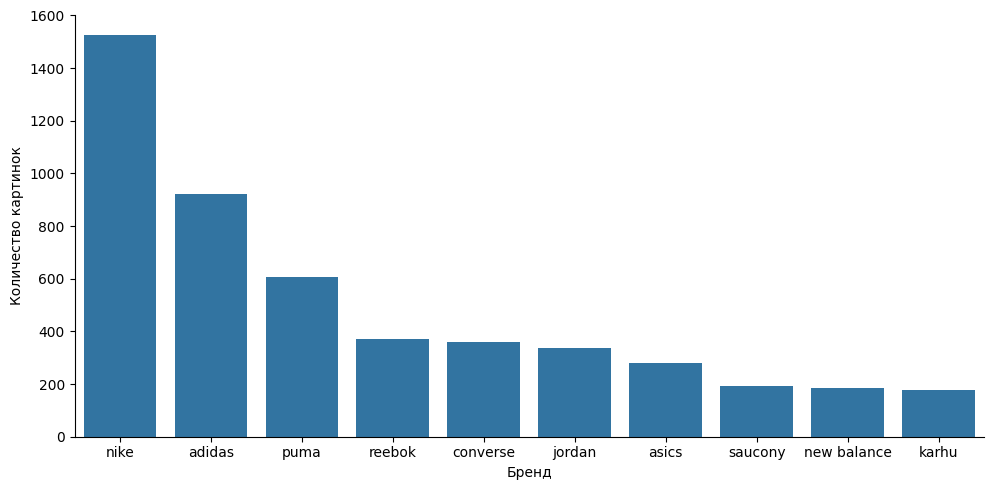

In [14]:
temp = by_brands.sort_values(by="unique_images_count", ascending=False)[["brand_merge", "unique_images_count"]][
    :10
].copy()
temp.columns = ["Бренд", "Количество картинок"]
sns.catplot(temp, x="Бренд", y="Количество картинок", kind="bar", aspect=2, legend=True)

# Количество картинок в датасете по брендам

In [15]:
get_images_count(brands_images_path)

5892

## Расширения картинок - проверили, что всё приведено к одному формату

In [16]:
set(get_images_formats(brands_images_path))

{'JPEG'}

## Расширения файлов картинок

In [17]:
set(get_images_suffixes(brands_images_path))

{'.jpeg'}

# Палитра картинок - все картинки имеют три канала

In [18]:
set(get_images_modes(brands_images_path))

{'RGB'}

## Размеры картинок

In [19]:
sizes = get_images_sizes(brands_images_path)
print("Max size:", max(sizes, key=lambda x: (x[0], x[1])))
print("Min size:", min(sizes, key=lambda x: (x[0], x[1])))

Max size: (2000, 2000)
Min size: (432, 381)


# Датасет моделей

In [20]:
by_models = pd.read_csv("data/merged/metadata/models_dataset.csv")
models_images_path = "data/merged/images/by-models"
by_models

,title_merge,brand_merge,unique_images_count,images
0,01 low,autry,5,data/merged/images/by-models/01 low
1,01 low m,autry,8,data/merged/images/by-models/01 low m
2,01 low man,autry,1,data/merged/images/by-models/01 low man
3,01 low w,autry,10,data/merged/images/by-models/01 low w
4,01 low wom,autry,1,data/merged/images/by-models/01 low wom
...,...,...,...,...
872,zoom verona slip,nike,6,data/merged/images/by-models/zoom verona slip
873,zoom verona slip x leticia bufon,nike,3,data/merged/images/by-models/zoom verona slip ...
874,zoom vomero 5 sp,nike,10,data/merged/images/by-models/zoom vomero 5 sp
875,zx 22 boost,adidas,5,data/merged/images/by-models/zx 22 boost


## Топ моделей по количеству картинок

In [21]:
by_models.sort_values(by="unique_images_count", ascending=False)[["title_merge", "unique_images_count"]]

,title_merge,unique_images_count
580,shadow 6000,95
327,fusion 20,59
730,wmns air force 1 07,54
21,550,53
579,shadow 5000,47
...,...,...
274,court peak,1
379,instapump fury boost,1
447,mirage mox vision,1
610,slipstream the neverworn ii,1


## Количество картинок

In [22]:
get_images_count(models_images_path)

5922

## Расширения картинок

In [23]:
set(get_images_formats(models_images_path))

{'JPEG'}

## Расширения файлов картинок

In [24]:
set(get_images_suffixes(models_images_path))

{'.jpeg'}

# Палитра картинок

In [25]:
set(get_images_modes(models_images_path))

{'RGB'}

# Размеры картинок

In [26]:
sizes = get_images_sizes(models_images_path)
print("Max size:", max(sizes, key=lambda x: (x[0], x[1])))
print("Min size:", min(sizes, key=lambda x: (x[0], x[1])))

Max size: (2000, 2000)
Min size: (432, 381)
